In [5]:
import numpy as np
import matplotlib.pyplot as plt

from data import data_loader

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [6]:
train_generator, val_generator, test_generator = data_loader.load_data()

Found 70499 images belonging to 29 classes.
Found 7830 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    input_shape = data_batch.shape[1:]
    num_classes = labels_batch.shape[1]
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 29)


In [8]:
input_shape

(150, 150, 3)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

Metal device set to: Apple M1 Pro


2022-12-13 17:14:17.018729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 17:14:17.019061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=10
)

Epoch 1/10


2022-12-13 17:14:23.765435: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 17:14:24.043924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.8014

2022-12-13 17:15:44.583880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - 87s 78ms/step - loss: 0.6538 - accuracy: 0.8014 - val_loss: 0.7278 - val_accuracy: 0.7701
Epoch 2/10
1102/1102 [==============================] - 87s 79ms/step - loss: 0.0782 - accuracy: 0.9744 - val_loss: 0.6935 - val_accuracy: 0.7985
Epoch 3/10
1102/1102 [==============================] - 86s 78ms/step - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.6852 - val_accuracy: 0.8346
Epoch 4/10
1102/1102 [==============================] - 86s 78ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.6145 - val_accuracy: 0.8522
Epoch 5/10
1102/1102 [==============================] - 84s 77ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.7260 - val_accuracy: 0.8322
Epoch 6/10
1102/1102 [==============================] - 85s 77ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.7029 - val_accuracy: 0.8444
Epoch 7/10
1102/1102 [==============================] - 85s 77ms/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.9415 - val_accura

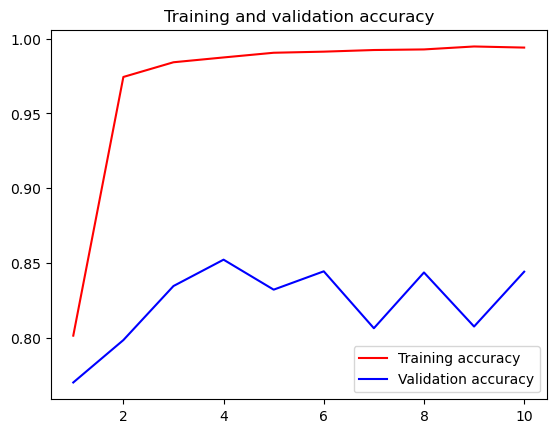

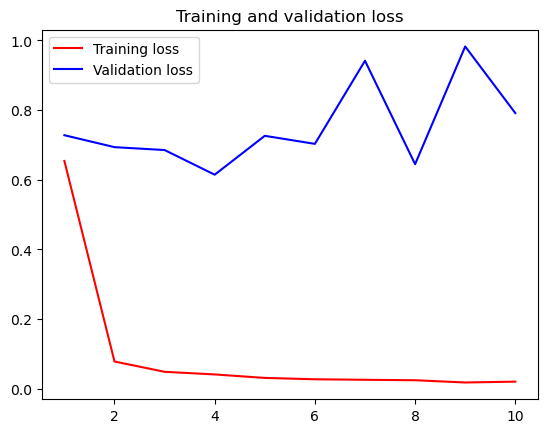

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
scores = model.evaluate(test_generator)

print(f'Test {model.metrics_names[1]} is {100 * scores[1]}')
print(f'Test {model.metrics_names[0]} is {scores[0]}')

136/136 [==============================] - 7s 54ms/step - loss: 0.1027 - accuracy: 0.9809
Test accuracy is 98.09195399284363
Test loss is 0.10271430760622025


In [15]:
from sklearn.metrics import classification_report
 
test_labels=test_generator.classes 

predictions=model.predict(test_generator, verbose=1)

y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

  3/136 [..............................] - ETA: 6s 

2022-12-13 17:29:11.493024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


136/136 [==============================] - 8s 56ms/step
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       300
           1       0.05      0.05      0.05       300
           2       0.04      0.04      0.04       300
           3       0.04      0.04      0.04       300
           4       0.02      0.02      0.02       300
           5       0.02      0.02      0.02       300
           6       0.03      0.03      0.03       300
           7       0.03      0.03      0.03       300
           8       0.05      0.05      0.05       300
           9       0.02      0.02      0.02       300
          10       0.03      0.03      0.03       300
          11       0.04      0.04      0.04       300
          12       0.02      0.02      0.02       300
          13       0.04      0.04      0.04       300
          14       0.05      0.05      0.05       300
          15       0.02      0.02      0.02       300
          16       0.03  

In [16]:
model.layers

In [17]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [18]:
img_path = 'data/live_capture/image_1670198213.580283.jpg'

from keras.preprocessing import image                             
import numpy as np

img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.                                                
print(img_tensor.shape)

(1, 150, 150, 3)


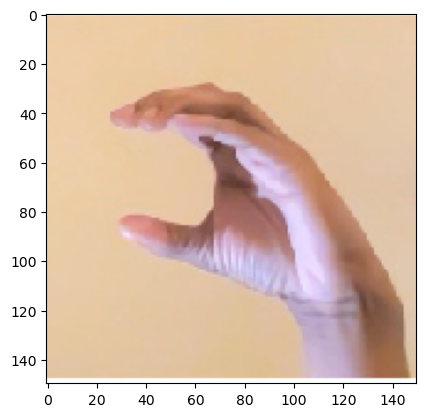

In [19]:
plt.imshow(img_tensor[0])
plt.show()

In [20]:
activations = activation_model.predict(img_tensor) 

1/1 [==============================] - 0s 100ms/step


2022-12-13 17:29:29.038982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [21]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


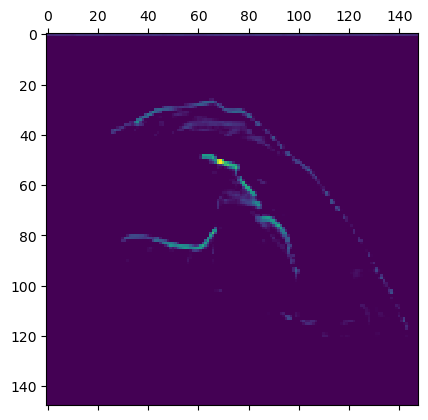

In [24]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

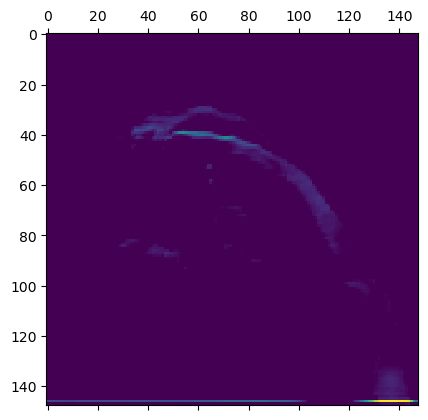

In [23]:
plt.matshow(first_layer_activation[0, :, :, 13], cmap='viridis')

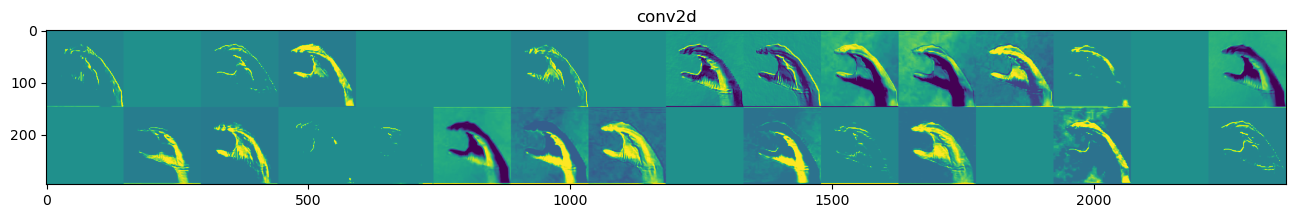

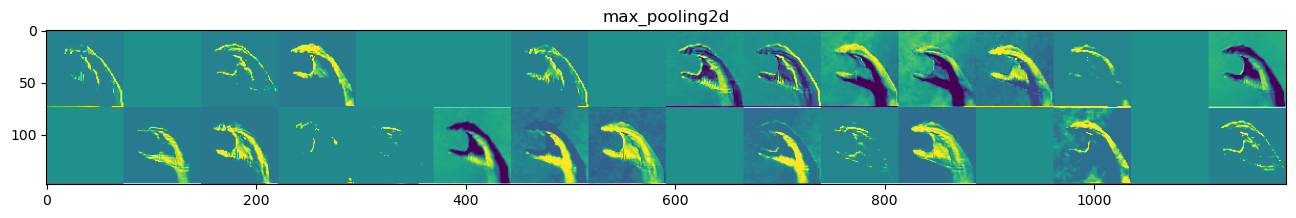

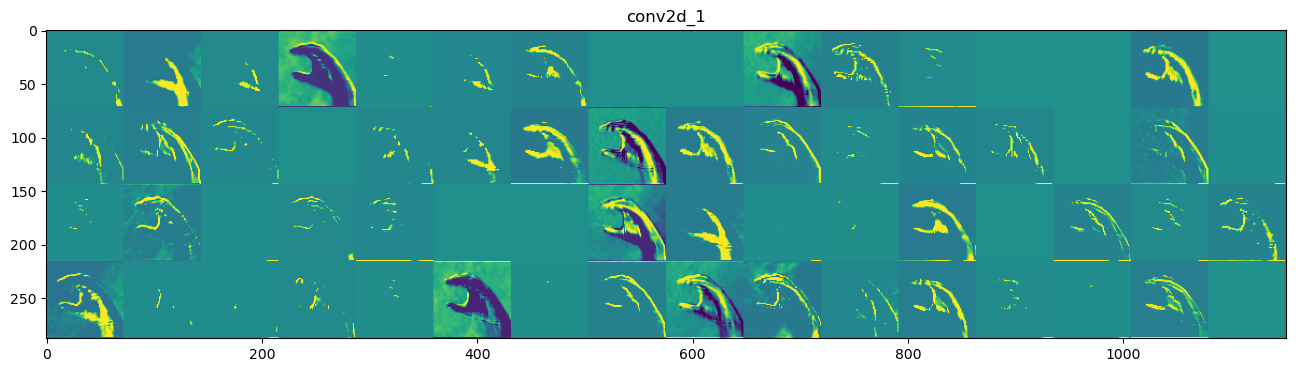

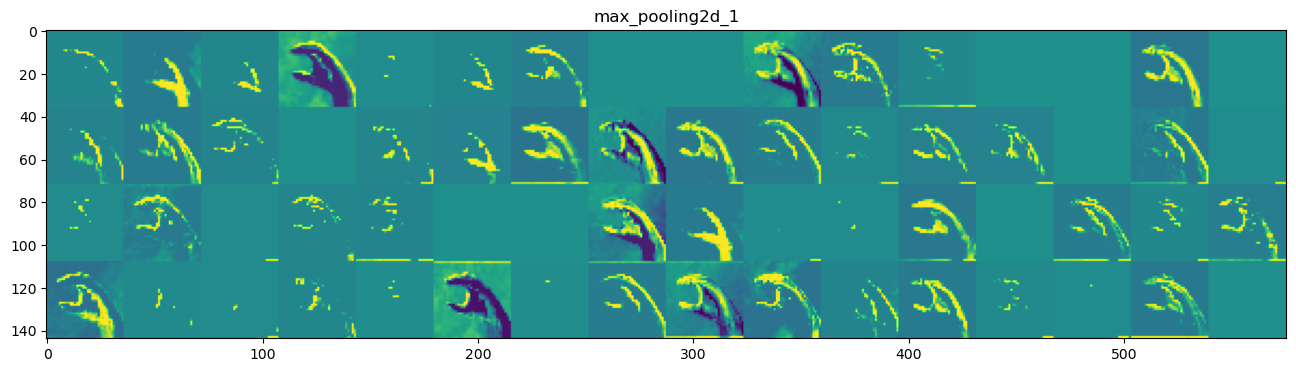

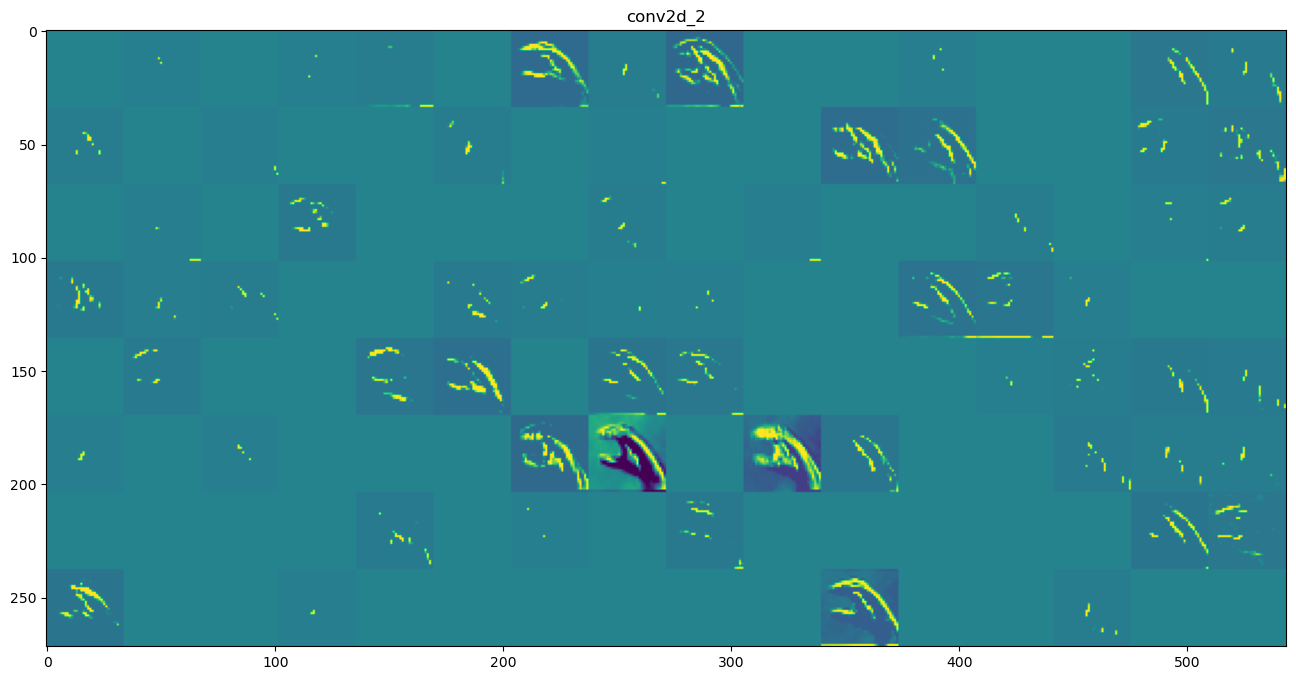

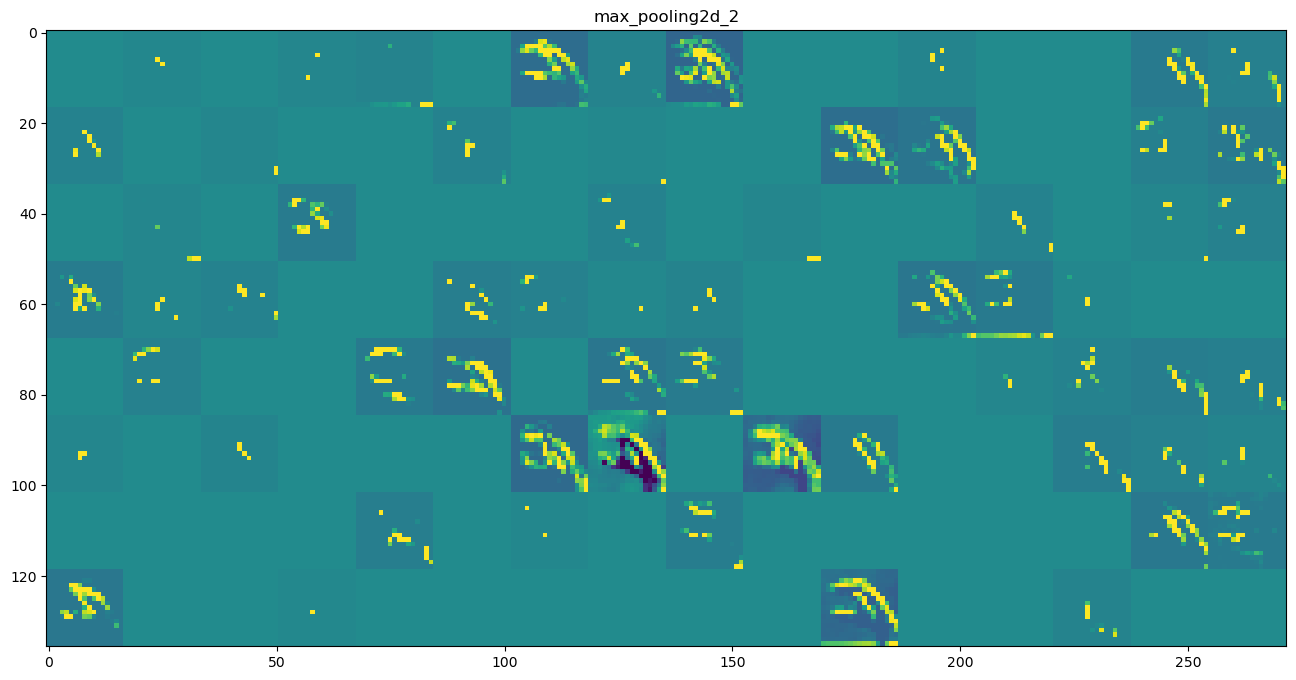

In [26]:
layer_names = []                                                          
for layer in model.layers[:6]:                                            
    layer_names.append(layer.name)                                        

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                               

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            if channel_image.std():
                channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
model.save('model/model_3')

In [16]:
from tensorflow.keras import backend
backend.clear_session()